Group 13, Tyson Senger #29355971, Nick Jean

Following cell imports all relevant libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import random

This is the cell where you'll define the folder destination information for whatever training and testing data you wish to use

In [45]:
training_path = 'C:/Users/User/VSCodeFiles/Projects/418/Project/Lego_dataset_1/training'
testing_path = 'C:/Users/User/VSCodeFiles/Projects/418/Project/Lego_dataset_1/testing'

This cell defines the training function, it takes as an input the training path input above, formats the images into dataframes, trains the data and outputs the performance metrics

In [46]:
def training_function(path):
    
    global df2, model, X, y, y_train_pred, class_mapping    #Globalizing some variables for other functions
    
    #Initializing variables that don't change with for loop
    pixel_values = {}
    width, height = 23, 23  #Defining the desired pixel dimensions
    left = width // (1/0.31)     #(Original = 0.325) Defining the borders to crop too, relative to width/height above
    upper = height // (1/0.2)    #(Original = 0.225)
    right = width // (1/0.69)    #(Original = 0.675)
    lower = height // (1/0.8)    #(Original = 0.775)
    
    #Iterating through the PNG files in training folder
    for image_name in os.listdir(path):  #For loop to iterate through images
        
        image_path = os.path.join(path,image_name)   #Loading image path file name to a variable to be used during loop
        image = Image.open(image_path)  #Loading current image of for loop iteration
        image_resized = image.resize((width, height))    #Scaling to desired pixel dimensions **Important: Scale first then crop, as it retains more image data then cropping first
        cropped_image = image_resized.crop((left, upper, right, lower))     #Cropping
        image_gray = cropped_image.convert('L')     #Grayscaling
        pixels = list(image_gray.getdata())     #Extracting list of pixel gray scale values
        pixel_values[image_name] = pixels   #Saving the list of pixel data entries into the dictionary previously initialized
    
    df = pd.DataFrame(pixel_values)  #Converting into a data frame
    
    #The code after this formats the pixel data such the the model can be trained properly
    df1 = df.transpose()    #Transposing data so that each row is an individual image and the columns represent the pixel values and the class information
    df1.reset_index(drop=False, inplace=True)    #After transposing the index values of the data frame need to be reset
    df1['image_name'] = df1['index']    #Moving the image name information into a non-index column
    df2 = df1.drop(columns='index')  #Dropping the image name index as it's no longer needed
    df2['image_name'] = df2['image_name'].astype('str')  #Changing the image_name column to data type 'str' so we can use the str.extract function
    df2['Class'] = df2['image_name'].str.extract(r'(\w+)_[0-9]+\.png')  #Adding a new column that consists of the classification part of the image name string
    
    #Defining the mapping of string variables to numerical values that the model can identify
    class_mapping = {
        
        '2b1': 0,
        'cir': 1,
        'squ': 2,
        'rec': 3
    }
    
    df2['Class'] = df2['Class'].replace(class_mapping)  #Replacing the string variables with the previously mentioned class mapping
    X = df2.drop(columns=['image_name','Class'])     #Splitting up the data into x and y variables for model training
    y = df2['Class']     #As there is a separate testing data set, there is no need to use train test split
    
    #The code after this will be creating the model
    model = SVC(kernel = 'linear', C=1.0, random_state=3)    #Defining model parameters
    model.fit(X, y)  #Fitting the model
    y_train_pred = model.predict(X)     #Calculating the training predicted class values for performance against training data
                                        #Testing performance against training data which the model has seen, more important test is against testing data
    
    #Performance evaluation
    num_parameters = model.n_support_.sum() + len(model.intercept_)  #Calculating the number of parameters in the model
    accuracy = accuracy_score(y, y_train_pred)  #Getting the accuracy scores for the model
    cm = confusion_matrix(y, y_train_pred)   #Getting confusion matrix 
    classification_rep = classification_report(y, y_train_pred)  #Getting classification report
    
    #Printing performance metrics
    print(f"Accuracy: {accuracy}")
    print("Trainable Parameters per Class(4):", num_parameters/4) 
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(cm)

The following cell defines the testing function. It takes, as an input, the testing data path input above, transforms the testing images into a dataframe, loads the model created in the training function, tests the model agaisnt the test image data and outputs the performance metrics

In [47]:
def test_function(path):
    
    global df5, X_test, y_test, y_pred #Globalizing some variables
    
    #Initializing variables that don't change with for loop
    pixel_values = {}
    width, height = 23, 23
    left = width // (1/0.31)    #(Original = 0.325)
    upper = height // (1/0.2)   #(Original = 0.225)
    right = width // (1/0.69)   #(Original = 0.675)
    lower = height // (1/0.8)   #(Original = 0.775)

    #Iterating through the PNG files in training folder
    for image_name in os.listdir(path):     #For loop to iterate through images
        
        image_path = os.path.join(path,image_name)  #Loading image path file name to a variable to be used during loop
        image = Image.open(image_path)  #Loading current image of for loop iteration
        image_resized = image.resize((width, height))
        cropped_image = image_resized.crop((left, upper, right, lower))
        image_gray = cropped_image.convert('L')
        pixels = list(image_gray.getdata())
        pixel_values[image_name] = pixels   #Saving the list of pixel data entries into the dictionary previously initialized
    
    df3 = pd.DataFrame(pixel_values) #Converting into a data frame
    
    #The code after this formats the pixel data such the the model can be trained properly
    df4 = df3.transpose()   #Transposing data so that each row is an individual image and the columns represent the pixel values and the class information
    df4.reset_index(drop=False, inplace=True)   #After transposing the index values of the data frame need to be reset
    df4['image_name'] = df4['index']     #Moving the image name information into a non-index column
    df5 = df4.drop(columns='index')     #Dropping the image name index as it's no longer needed
    df5['image_name'] = df5['image_name'].astype('str')     #Changing the image_name column to data type 'str' so we can use the str.extract function
    df5['Class'] = df5['image_name'].str.extract(r'(\w+)_[0-9]+\.png')  #Adding a new column that consists of the classification part of the image name string
    df5['Class'] = df5['Class'].replace(class_mapping)  #Replacing the string variables with the previously mentioned class mapping
    X_test = df5.drop(columns=['image_name','Class'])   #Splitting up the data into x and y variables for model training
    y_test = df5['Class']   #As there is a separate training data set, there is no need to use train test split
    
    #Predicting the class of each row of the test data set
    y_pred = model.predict(X_test) 
    
    #Performance evaluation
    num_parameters = model.n_support_.sum() + len(model.intercept_)     #Calculating the number of parameters in the model
    accuracy = accuracy_score(y_test, y_pred)   #Calculating the accuracy of the model
    cm = confusion_matrix(y_test, y_pred)    #Creating the confusion matrix of the 4 class variable prediction
    classification_rep = classification_report(y_test, y_pred)  #Getting classification report
    
    #Printing performance metrics
    print(f"Accuracy: {accuracy}")
    print("Trainable Parameters per Class(4):", num_parameters/4)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(cm)
    

The following function takes the predicted values from the model and finds where the model guessed incorrectly. It then outputs the images that the model got wrong as well as the guessed class value, the correct class value and the image index value

In [70]:
def show_error():
    
    #Displaying image value mapping to reference in output
    mapping = pd.DataFrame(class_mapping, index=[0])    
    print('Image value mapping:')
    print(mapping)
    
    #Creating the mask to filter out incorrect guesses 
    test = pd.DataFrame({'Test':y_test})
    pred = pd.DataFrame({'Prediction': y_pred})
    result = pd.concat([test,pred], axis=1)
    mask = result['Test'] != result['Prediction']

   
    filtered_df = result[mask]  #Creating the data frame of incorrect guesses using the mask

    #Preparing variables for the loop
    row_index = filtered_df.index.tolist()  #Getting a list of index values that are associated with an incorrect guess
    image_error = [df5.loc[row_index, 'image_name'] for row_index, image_name in zip(row_index, 'image_name')]  #Using that list to get the index values of all the wrong guesses
    image_index = 0     #Initializing
    filtered_df.reset_index(inplace=True, drop=True)    #Dropping the index as we have the row_index variable
    counter = 0     #Initializing
    
    #Iterating through the images of the incorrect guesses
    for file_name in image_error:
        
        file_path = testing_path + '/' + file_name
    
        #Displaying the image if the file path has a valid image to output
        try:
            image = Image.open(file_path)
            plt.imshow(image)
            plt.axis('off') 
            plt.show()
            print(filtered_df.loc[image_index])
            print('Image reference number for comparing image data:', row_index[counter])   
            
        except Exception as e:
            print(f"Error opening {file_name}: {str(e)}")
        
        #Incrementing counters
        counter += 1
        image_index = image_index +1     
        

The following function separates the test image data by class, then takes the average grayscale pixel value for each pixel and graphs the average pixel value for each pixel of each class

In [72]:
def compare_average():
    
    #Globalizing variables used in other functions
    global class_0,class_1,class_2,class_3, average_tot
    
    #Splitting up the testing data into variables by class value
    class_0 = df5[df5['Class'] == 0].drop(columns=['image_name','Class'])
    class_1 = df5[df5['Class'] == 1].drop(columns=['image_name','Class'])
    class_2 = df5[df5['Class'] == 2].drop(columns=['image_name','Class'])
    class_3 = df5[df5['Class'] == 3].drop(columns=['image_name','Class'])

    #Calculating the average value of the data frames above by class
    class_0_average = class_0.mean(axis=0).to_frame().T
    class_1_average = class_1.mean(axis=0).to_frame().T
    class_2_average = class_2.mean(axis=0).to_frame().T
    class_3_average = class_3.mean(axis=0).to_frame().T
    
    #Recombining the averages above into a single data frame
    average_tot = pd.concat([class_0_average,class_1_average,class_2_average,class_3_average], axis = 0)
    average_tot.reset_index(inplace=True,drop=True)

    #Displaying the average pixel value by pixel index
    fig, axes = plt.subplots(1, len(average_tot.index), figsize=(12, 4))
    print('These graphs represent the average pixel data for each class of Lego:')
    
    for i, row in enumerate(average_tot.index):
        ax = axes[i]
        ax.scatter(average_tot.columns, average_tot.loc[row])
        ax.set_xlabel('Pixels')
        ax.set_ylabel('Average Gray Scale Values')
        ax.set_title(f'Average Pixel Data for Class: {row}')
        ax.grid(True)
    
    #Outputting graph   
    plt.tight_layout()
    plt.show()

The following function takes, as an input, the image index value of an image and an image class value. It then graphs the pixel data of the input image as well as the pixel data of a random image from the class that is taken as input.

In [74]:
def compare_image_data(image_number_1,predicted_class):
    
    #Choosing a random image index value by class
    if predicted_class == 0:
        image_number_2 = random.choice(class_0.index)
    if predicted_class == 1:
        image_number_2 = random.choice(class_1.index)   
    if predicted_class == 2:
        image_number_2 = random.choice(class_2.index) 
    if predicted_class == 3:
        image_number_2 = random.choice(class_3.index)   
    
    #Creating a data frame of the two images that are put into the function    
    df6 = df5.iloc[[image_number_1,image_number_2]]
    df7 = df6.drop(columns=['image_name','Class'])

    colors = ['blue', 'red']    #Initializing
    
    #Output
    print('In this graph, we compare the image data of the desired image against the image data of a random image from the class that is input:')
    
    for i, row in enumerate(df7.index):
        plt.scatter(df7.columns, df7.loc[row], label=f'Image Number: {row}', c=colors[i])
        
    plt.xlabel('Pixel')
    plt.ylabel('Gray Scale Value')
    plt.legend()
    plt.title('Gray Scale Pixel Value vs. Pixel')
    plt.grid(True)
    plt.show()

Training function cell

**Important note: the number of trainable parameters depends on the number of images 

In [51]:
training_function(training_path)

Accuracy: 1.0
Trainable Parameters per Class(4): 11.75
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Confusion Matrix:
[[36  0  0  0]
 [ 0 36  0  0]
 [ 0  0 36  0]
 [ 0  0  0 36]]


Testing function cell

In [52]:
test_function(testing_path)

Accuracy: 0.9305555555555556
Trainable Parameters per Class(4): 11.75
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.94      0.92        18
           2       0.84      0.89      0.86        18
           3       1.00      0.89      0.94        18

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72

Confusion Matrix:
[[18  0  0  0]
 [ 0 17  1  0]
 [ 0  2 16  0]
 [ 0  0  2 16]]


Error presentation cell

Image value mapping:
   2b1  cir  squ  rec
0    0    1    2    3


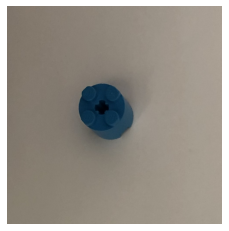

Test          1
Prediction    2
Name: 0, dtype: int64
Image reference number for comparing image data: 19


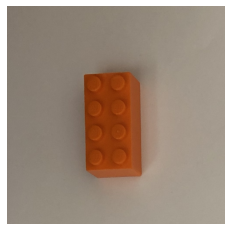

Test          3
Prediction    2
Name: 1, dtype: int64
Image reference number for comparing image data: 37


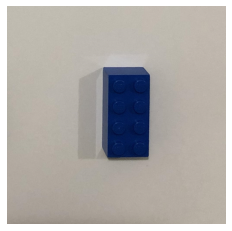

Test          3
Prediction    2
Name: 2, dtype: int64
Image reference number for comparing image data: 53


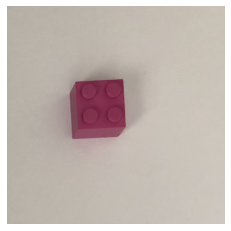

Test          2
Prediction    1
Name: 3, dtype: int64
Image reference number for comparing image data: 57


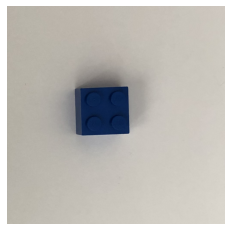

Test          2
Prediction    1
Name: 4, dtype: int64
Image reference number for comparing image data: 60


In [73]:
show_error()

Average pixel data by class cell

These graphs represent the average pixel data for each class of Lego:


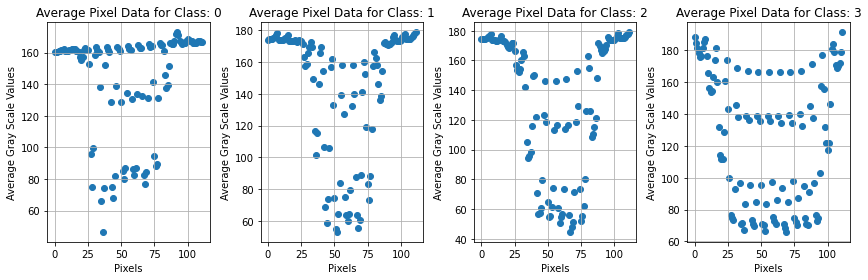

In [75]:
compare_average()

Single image data comparison cell

**Important: Must have an image index value that is in range for the testing set, and a class value of 0, 1, 2 or 3

In this graph, we compare the image data of the desired image against the image data of a random image from the class that is input:


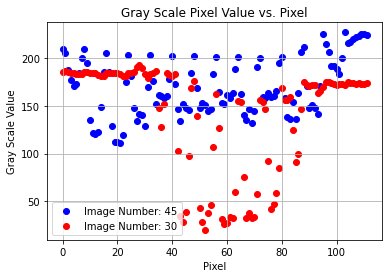

In [55]:
compare_image_data(45,1)